In [2]:
import numpy as np
import pandas as pd

In [3]:
df = pd.read_csv("car.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9582 entries, 0 to 9581
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Brand         9582 non-null   object
 1   model         9582 non-null   object
 2   Year          9582 non-null   int64 
 3   Age           9582 non-null   int64 
 4   kmDriven      9535 non-null   object
 5   Transmission  9582 non-null   object
 6   Owner         9582 non-null   object
 7   FuelType      9582 non-null   object
 8   PostedDate    9582 non-null   object
 9   AdditionInfo  9582 non-null   object
 10  AskPrice      9582 non-null   object
dtypes: int64(2), object(9)
memory usage: 823.6+ KB


In [4]:
cat_col = [d for d in df.columns if df[d].dtype == 'object']
num_col = [d for d in df.columns if df[d].dtype != 'object']
print(cat_col)
print(num_col)

['Brand', 'model', 'kmDriven', 'Transmission', 'Owner', 'FuelType', 'PostedDate', 'AdditionInfo', 'AskPrice']
['Year', 'Age']


In [5]:
df[cat_col].nunique()

Brand             39
model            400
kmDriven        1910
Transmission       2
Owner              2
FuelType           3
PostedDate        12
AdditionInfo    7307
AskPrice        1330
dtype: int64

In [6]:
df.PostedDate.unique()

array(['Nov-24', 'Jul-24', 'Oct-24', 'Aug-24', 'Sep-24', 'May-24',
       'Jun-24', 'Apr-24', 'Jan-24', 'Feb-24', 'Dec-23', 'Mar-24'],
      dtype=object)

In [7]:
df2 = df.drop(columns=["PostedDate","AdditionInfo"])
round((df2.isnull().sum()/df2.shape[0])*100,2)


Brand           0.00
model           0.00
Year            0.00
Age             0.00
kmDriven        0.49
Transmission    0.00
Owner           0.00
FuelType        0.00
AskPrice        0.00
dtype: float64

In [8]:
import seaborn as sb
import matplotlib.pyplot as plt
categorical_cols = ['Brand', 'Model', 'Transmission', 'Owner', 'FuelType']
categorical_cols


['Brand', 'Model', 'Transmission', 'Owner', 'FuelType']

C:\Users\cheta\AppData\Local\Temp\ipykernel_33940\3790574072.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=col, order=value_counts.index, palette='Set2')


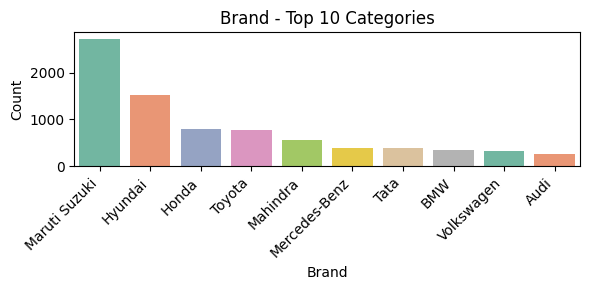

C:\Users\cheta\AppData\Local\Temp\ipykernel_33940\3790574072.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=col, order=value_counts.index, palette='Set2')


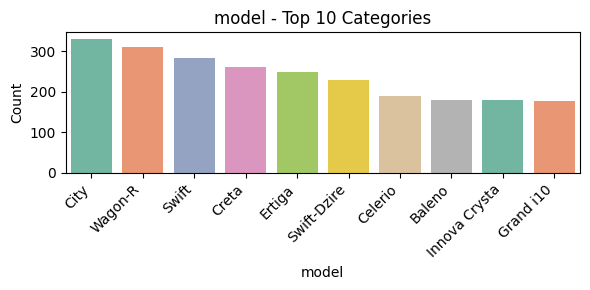

C:\Users\cheta\AppData\Local\Temp\ipykernel_33940\3790574072.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=col, order=value_counts.index, palette='Set2')


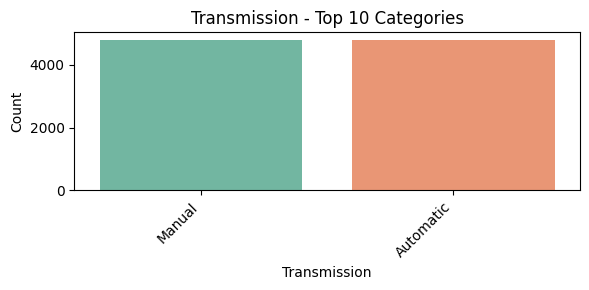

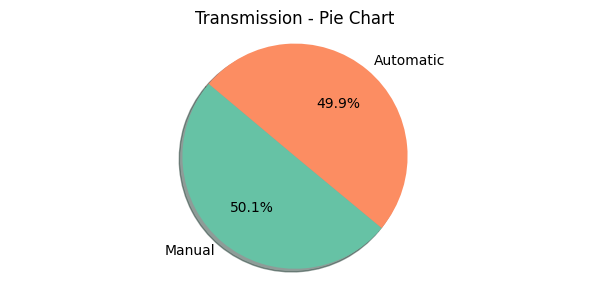

C:\Users\cheta\AppData\Local\Temp\ipykernel_33940\3790574072.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=col, order=value_counts.index, palette='Set2')


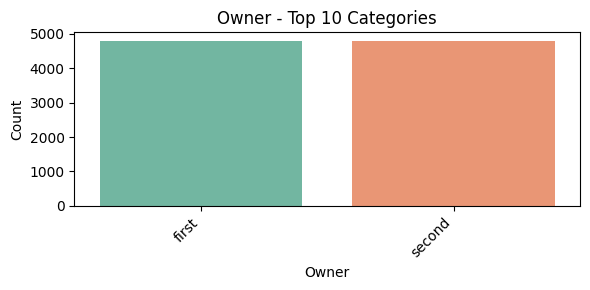

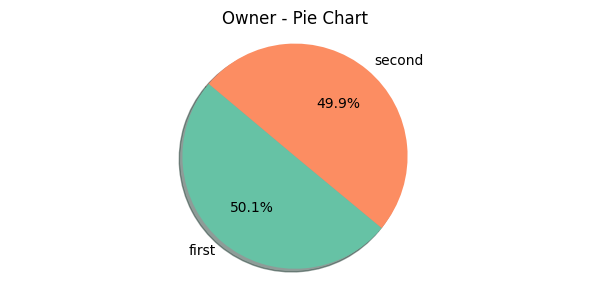

C:\Users\cheta\AppData\Local\Temp\ipykernel_33940\3790574072.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=filtered_df, x=col, order=value_counts.index, palette='Set2')


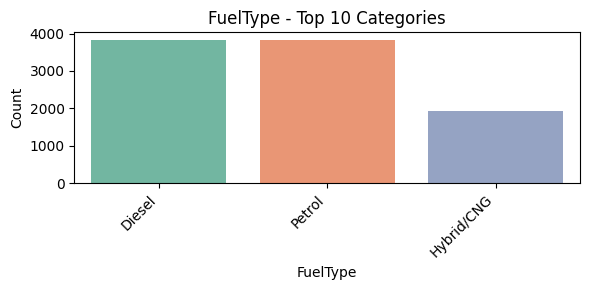

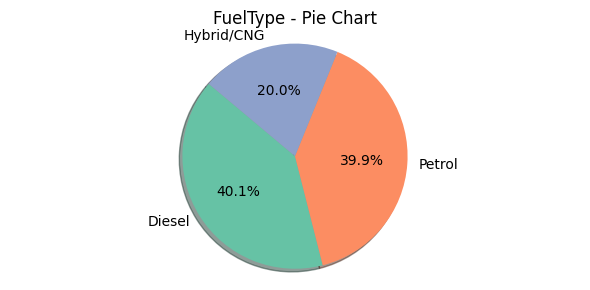

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

categorical_cols = ['Brand', 'model', 'Transmission', 'Owner', 'FuelType']

for col in categorical_cols:
    plt.figure(figsize=(6,3))
    top_n = 10
    value_counts = df2[col].value_counts().nlargest(top_n)
    filtered_df = df2[df2[col].isin(value_counts.index)]

    # --- Seaborn Bar Plot ---
    sns.countplot(data=filtered_df, x=col, order=value_counts.index, palette='Set2')
    plt.title(f'{col} - Top {top_n} Categories')
    plt.xticks(rotation=45, ha='right')
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()

    # --- Pie Chart (only if few categories) ---
    if df2[col].nunique() <= 6:
        plt.figure(figsize=(6, 3))
        values = df2[col].value_counts()
        plt.pie(values, labels=values.index, autopct='%1.1f%%', startangle=140, shadow=True, colors=sns.color_palette('Set2'))
        plt.title(f'{col} - Pie Chart')
        plt.axis('equal')
        plt.tight_layout()
        plt.show()


In [10]:
import numpy as np

print(num_col)
outlier_percentage = {}

for col in num_col:
    col_data = df[col]
    q1 = np.percentile(col_data, 25)
    q3 = np.percentile(col_data, 75)
    iqr = q3 - q1
    upper = q3 + 1.5 * iqr
    lower = q1 - 1.5 * iqr

    # Boolean mask for outliers
    outliers_mask = (col_data < lower) | (col_data > upper)
    outlier_count = outliers_mask.sum()
    outlier_percentage[col] = (outlier_count / len(col_data)) * 100

    print(f"Count of outliers in column '{col}': {outlier_count}")
    print(f"Percentage of outliers in column '{col}': {outlier_percentage[col]:.2f}%")
    print(f"Lower bound: {lower}")
    print(f"Upper bound: {upper}")
    print(f"Outlier data:\n{col_data[outliers_mask].values}")
    print("\n==============================================\n")


['Year', 'Age']
Count of outliers in column 'Year': 139
Percentage of outliers in column 'Year': 1.45%
Lower bound: 2006.5
Upper bound: 2026.5
Outlier data:
[2001 2006 2005 1998 2004 2006 2006 1994 2006 2005 2005 2006 2005 2006
 2004 2005 2005 2005 2002 2006 2006 2004 2002 2004 2003 1997 2004 2006
 2003 2005 2000 2004 2000 2003 1990 2006 2006 2005 2006 2006 2004 2006
 2006 2006 2004 2006 1996 1999 2006 2005 2006 2006 2005 2001 2001 2004
 1999 2005 2006 2005 2001 2005 2004 2004 2005 2005 2006 2006 2000 2003
 2005 2006 2002 2006 2006 2005 2006 2003 2004 1998 2004 1994 2004 2005
 2005 2001 1996 2003 2006 2006 2002 2006 2001 1998 2003 2005 2006 1986
 2005 2003 2005 2006 1994 2006 2003 2006 1999 2004 2002 1997 2003 2004
 2006 2006 2005 2006 2005 2005 2004 2006 2003 2006 2005 2004 2003 2005
 1999 2005 2006 2006 2006 2005 2004 2002 2000 2004 2005 2005 2006]


Count of outliers in column 'Age': 139
Percentage of outliers in column 'Age': 1.45%
Lower bound: -2.5
Upper bound: 17.5
Outlier data:


In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
df = pd.read_csv("car.csv")

df['Owner'] = df['Owner'].map({'first': 0, 'second': 1})
df['FuelType'] = df['FuelType'].map({'Petrol': 0, 'Diesel': 1})
df['Transmission'] = df['Transmission'].map({'Manual': 0, 'Automatic': 1})

df['kmDriven'] = df['kmDriven'].astype(str).str.replace(',', '').str.extract('(\d+)').astype(float)
df['AskPrice'] = df['AskPrice'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False).str.extract('(\d+)').astype(float)
df['AskPrice'] = df['AskPrice'].fillna(df['AskPrice'].mean())

df['kmDriven'] = df['kmDriven'].fillna(df['kmDriven'].mean())

df['Age'] = df['Age'].astype(int)
df['AskPrice'] = df['AskPrice'].astype(float)

df_encoded = pd.get_dummies(df, columns=['Brand', 'model'], drop_first=True)

X = df_encoded[['Age', 'kmDriven', 'Owner'] + 
               [col for col in df_encoded.columns if col.startswith('Brand_') or col.startswith('model_')]]

y = df_encoded['AskPrice']  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
for q in y_pred:
    print(q)
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))

<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
<>:10: SyntaxWarning: invalid escape sequence '\d'
<>:11: SyntaxWarning: invalid escape sequence '\d'
C:\Users\cheta\AppData\Local\Temp\ipykernel_33940\2674617002.py:10: SyntaxWarning: invalid escape sequence '\d'
  df['kmDriven'] = df['kmDriven'].astype(str).str.replace(',', '').str.extract('(\d+)').astype(float)
C:\Users\cheta\AppData\Local\Temp\ipykernel_33940\2674617002.py:11: SyntaxWarning: invalid escape sequence '\d'
  df['AskPrice'] = df['AskPrice'].astype(str).str.replace('₹', '', regex=False).str.replace(',', '', regex=False).str.extract('(\d+)').astype(float)


297675.699345171
523362.89258763427
436058.0059224949
1139085.349724596
1128618.9269187069
1785113.696469891
1566100.4632436982
198886.210695202
251250.13119098917
5015581.5082853995
345272.7029905608
287786.3662821618
1100553.7222029641
111405.33236549329
415953.55758332787
759203.4378200765
725249.4516009181
7124345.788188193
1247668.3502700184
-63032.19115305226
-180450.16809209436
523362.8925876329
351346.9417914832
26114.75512744952
837497.432639292
569379.44068282
1642912.6366185271
-703542.2718288936
369405.1826087814
11671409.200267633
2858601.916842697
357846.7301118518
8794.01302639721
416541.9025254017
835970.6472215378
1113032.2138833492
2579123.253698666
1075322.4268161114
-3070.4756602752022
1646786.1632450493
336352.3222950427
1738705.0332429484
442615.2493281625
1321966.303184437
914377.3948234422
-159543.43255810067
198863.68924424564
249746.96839926532
147709.60396147612
-39225.86825822946
827531.3236305774
112589.20360017521
913162.2649984667
1864498.3306793673
36165